# Import

In [1]:
import numpy as np
import pandas as pd
import sklearn
from random import choice

In [2]:
df = pd.read_csv('listings_detail.csv')

/Users/chengeping/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (43,61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

id                          listing_url       scrape_id last_scraped  \
0   44054   https://www.airbnb.com/rooms/44054  20190417125910   2019-04-17   
1  100213  https://www.airbnb.com/rooms/100213  20190417125910   2019-04-17   
2  128496  https://www.airbnb.com/rooms/128496  20190417125910   2019-04-17   
3  161902  https://www.airbnb.com/rooms/161902  20190417125910   2019-04-17   
4  162144  https://www.airbnb.com/rooms/162144  20190417125910   2019-04-17   

                                          name  \
0         Modern and Comfortable Living in CBD   
1  The Great Wall Box Deluxe Suite A团园长城小院东院套房   
2          Heart of Beijing: House with View 2   
3             cozy studio in center of Beijing   
4            nice studio near subway, sleep 4    

                                             summary  \
0  East Apartments offers comfortable living away...   
1  This is your guide to live by the Great Wall! ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               space  \
0  East Apartments is a western managed serviced ...   
1  This is your guide to live by the Great Wall! ...   
2  确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...   
3  Forget about hotels that charge USD 200 or mor...   
4  Extended stay self-catering studio apartments ...   

                                         description experiences_offered  \
0  East Apartments offers comfortable living away...                none   
1  This is your guide to live by the Great Wall! ...                none   
2  确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...                none   
3  Forget about hotels that charge USD 200 or mor...                none   
4  Extended stay self-catering studio apartments ...                none   

                               neighborhood_overview  ... instant_bookable  \
0  The neighborhood is a private compound.  Just ...  ...                t   
1  5 mins walk to Panglongshan Great Wall, 25 min...  ...                t   
2                                                NaN  ...                f   
3                                                NaN  ...                t   
4                                                NaN  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               9   
1                               4   
2                               1   
3                               5   
4                               5   

   calculated_host_listings_count_entire_homes  \
0                                            7   
1                                            0   
2                                            1   
3                                            5   
4                                            5   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            3   
2                                            0   
3                                            0   
4                                            0   

   calculated_host_listings_count_shared_r

In [4]:
df.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  2.845200e+04  2.845200e+04            0.0         0.0             0.0   
mean   2.628583e+07  2.019042e+13            NaN         NaN             NaN   
std    6.403312e+06  9.015783e+00            NaN         NaN             NaN   
min    4.405400e+04  2.019042e+13            NaN         NaN             NaN   
25%    2.245616e+07  2.019042e+13            NaN         NaN             NaN   
50%    2.787765e+07  2.019042e+13            NaN         NaN             NaN   
75%    3.134482e+07  2.019042e+13            NaN         NaN             NaN   
max    3.395441e+07  2.019042e+13            NaN         NaN             NaN   

            host_id  host_acceptance_rate  host_listings_count  \
count  2.845200e+04                   0.0         28452.000000   
mean   1.442821e+08                   NaN            13.821840   
std    7.057051e+07                   NaN            30.451182   
min    1.928750e+05                   NaN             0.000000   
25%    8.708958e+07                   NaN             2.000000   
50%    1.525464e+08                   NaN             5.000000   
75%    2.061464e+08                   NaN            12.000000   
max    2.563498e+08                   NaN           222.000000   

       host_total_listings_count  neighbourhood_group_cleansed  ...  \
count               28452.000000                           0.0  ...   
mean                   13.821840                           NaN  ...   
std                    30.451182                           NaN  ...   
min                     0.000000                           NaN  ...   
25%                     2.000000                           NaN  ...   
50%                     5.000000                           NaN  ...   
75%                    12.000000                           NaN  ...   
max                   222.000000                           NaN  ...   

       review_scores_checkin  review_scores_communication  \
count           16886.000000                 16896.000000   
mean                9.754767                     9.800249   
std                 0.842163                     0.777032   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value       license  \
count            16874.000000         16874.000000  3.000000e+00   
mean                 9.623918             9.509245  9.111011e+17   
std                  0.880637             1.019779  1.567673e+02   
min                  2.000000             2.000000  9.111011e+17   
25%                 10.000000             9.000000  9.111011e+17   
50%                 10.000000            10.000000  9.111011e+17   
75%                 10.000000            10.000000  9.111011e+17   
max                 10.000000            10.000000  9.111011e+17   

       calculated_host_listings_count  \
count                    28452.000000   
mean                        12.818290   
std                         29.261321   
min                          1.000000   
25%                          2.000000   
50%                          5.000000   
75%                         11.000000   
max                        222.000000   

       calculated_host_listings_count_entire_homes  \
count                                 28452.000000   
mean                                      8.238648   
std                                      22.836211   
min                                       0.000000   
25%                                       0.000000   
50%                                       2.000000   
75%                                       7.000000   
max                                     222.000000   

       calculated_host_listings_count_pri

In [5]:
df.shape

(28452, 106)

# Expand

In [6]:
choice_list= []

In [7]:
colnames = df.columns.values
# print(colnames)
dfnew = df

In [8]:
for i in range(0,len(colnames)):
    column_name=colnames[i]
#     print(column_name)
    valueslist=df[column_name].tolist()
    for _ in range(71548):
        selection = choice(valueslist)
        choice_list.append(selection)

In [9]:
dfnew[column_name]= pd.DataFrame(choice_list, columns=[column_name])
# print(dfnew[column_name])
choice_list.clear()

In [10]:
# will repeat 3 times in order to get the requirement size
for i in range(4,len(colnames)):
    namee=colnames[i]
#     print(namee)
    valueslist=df[namee].tolist()
    for _ in range(df.shape[0]):
        selection = choice(valueslist)
        choice_list.append(selection)
    dfnew[namee]= pd.DataFrame(choice_list, columns=[namee])
#     print(dfnew[namee])
    choice_list.clear()
dfmerge = df.append(dfnew, ignore_index=True)

In [11]:
colnames = dfmerge.columns.values
# print(colnames)
dfnew2 = dfmerge

In [12]:
for i in range(4,len(colnames)):
    namee=colnames[i]
#     print(namee)
    valueslist=dfmerge[namee].tolist()
    for _ in range(dfmerge.shape[0]):
        selection = choice(valueslist)
        choice_list.append(selection)
    dfnew2[namee]= pd.DataFrame(choice_list, columns=[namee])
#     print(df[namee])
    choice_list.clear()
dfmerge2 = dfmerge.append(dfnew2, ignore_index=True)

In [13]:
colnames = dfmerge2.columns.values
# print(colnames)
dfnew3 = dfmerge2

In [14]:
for i in range(4,len(colnames)):
    namee=colnames[i]
#     print(namee)
    valueslist=dfmerge2[namee].tolist()
    for _ in range(dfmerge2.shape[0]):
        selection = choice(valueslist)
        choice_list.append(selection)
    dfnew3[namee]= pd.DataFrame(choice_list, columns=[namee])
#     print(df[namee])
    choice_list.clear()
dfmerge3 = dfmerge2.append(dfnew3, ignore_index=True)
df=dfmerge3

In [15]:
print(df.to_csv("expanded.csv", encoding='utf-8', index=False))

None


In [16]:
df.head()

id                          listing_url       scrape_id last_scraped  \
0   44054   https://www.airbnb.com/rooms/44054  20190417125910   2019-04-17   
1  100213  https://www.airbnb.com/rooms/100213  20190417125910   2019-04-17   
2  128496  https://www.airbnb.com/rooms/128496  20190417125910   2019-04-17   
3  161902  https://www.airbnb.com/rooms/161902  20190417125910   2019-04-17   
4  162144  https://www.airbnb.com/rooms/162144  20190417125910   2019-04-17   

                                          name  \
0                    长安街loft高级公寓楼下床位合住建国门地铁三分钟   
1    北京宋庄艺术村落首家客栈(民宿)-石TOU剪刀布 风居住的街道 北街168(整院)   
2                          隐海｢有味·隆庆贰年｣恭王府旁百年老院   
3  近清华,体大,近上地地铁13号线,近8号线｡海淀清河五彩城,小米公司旁高档温馨安全社区   
4                              崇文门地铁干净整洁双人床四人间   

                                             summary  \
0  极简生活是隐山水旗下的加盟民宿,由设计师参与推荐,房东自主设计的家庭体验式民宿｡对于家庭旅行...   
1  非常抱歉,由于语言､文化､生活习惯的差异,暂不接待外籍人士,谢谢合作! 二环内市中心,位置绝...   
2  北京忆嘉酒店式服务公寓,位于北京顺义区天竺镇裕丰路16号院会展誉景国际公寓,公寓客房装修稳重...   
3  我的房源靠近市中心､公園､艺术和文化､优美的景色｡因为氛围､街区､户外空间､光照､舒适的床,...   
4                                                NaN   

                                               space  \
0  整套房子是两室一厅一卫的户型,主卧比较大,配备了一张双人床,南北通透,采光超好,阳光直撒床褥...   
1  我们为您提供免费高速wifi,整套办公桌椅,方便您高效办公! 我们为您提供1.8×2米的舒适...   
2                                                NaN   
3  无忧小院,这整套院子空间都很大｡相比较,卧室,庭院都足够大｡尤其是院内有两颗杏树,一颗小樱桃...   
4  Located right next to Chaoyang Park, subway li...   

                                         description experiences_offered  \
0  Come on over! The listing days are accurate on...                none   
1  遇见你,云山墅,坐落在美丽的云蒙山脚下,是天然氧吧,每年夏季温度宜人,是养生,茶道休闲的幽静...                none   
2  全新装修的loft,位于中粮祥云小镇南区,生活便利,楼下有超市和餐厅,离新国展和机场近｡ ★...                none   
3                                                NaN                none   
4  我和女儿还有不满一周的可爱宝宝即将和你合住一个小两居,共同分享客厅和卫生间｡小屋是北京体育大...                none   

                               neighborhood_overview  ... instant_bookable  \
0                          北新桥地铁5分钟,附近是鼓楼,雍和宫,吃的玩的都有  ...                f   
1  地铁4号线:马家堡A口出,嘉园一里(PHONE NUMBER HIDDEN)号线地铁马家堡站...  ...                f   
2  房子位于长安街延线 临近301医院､五棵松体育馆､华熙live-up,武警医院､中西医综合医...  ...                t   
3                                           详情可见房源描述  ...                t   
4  地理位置优越,距离北京西站步行仅需15分钟,出行便利｡去北京各个最好玩的地方都很近,小黄车应...  ...                f   

  is_business_travel_ready cancellation_policy require_guest_profile_picture  \
0                        f            moderate                             f   
1                        f            moderate                             f   
2                        f            flexible                             f   
3                        f            flexible                             f   
4                        f            flexible                             f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               6   
1                                f                               4   
2                                f                               2   
3                                f                               9   
4                                f                               5   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   
2                                            0   
3                                            7   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            6   
2                                            1   
3                                            3   
4                                            7   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0           19

# Pre-process

In [17]:
df.drop(["id","listing_url","scrape_id","last_scraped","name","space","description","experiences_offered","notes","access","thumbnail_url","medium_url","xl_picture_url","host_id","host_name","host_acceptance_rate","host_thumbnail_url","host_neighbourhood","host_listings_count","host_verifications","street","neighbourhood","neighbourhood_group_cleansed"
         ,"city","state","zipcode","smart_location","country_code","country","latitude","longitude","minimum_minimum_nights"
        ,"maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","calendar_last_scraped"
        ,"license","jurisdiction_names",],axis=1,inplace=True)


In [18]:
def getAmenitiesLabels(amenities):
    all_amenities=set()
    for x in amenities:
        x=x.strip("}")
        x=x.strip("{")
        x=x.replace('"','')
        x=x.split(",")
        x=set(x)
        all_amenities=all_amenities.union(x)

    all_amenities.remove('')
    all_amenities.remove('translation missing: en.hosting_amenity_49')
    all_amenities.remove('translation missing: en.hosting_amenity_50')
    return all_amenities

def getAllAmenities(amenities):
    amenities_list = []
    for x in amenities:
        x=x.strip("}")
        x=x.strip("{")
        x=x.replace('"','')
        x=x.split(",")
        x=set(x)
        amenities_list.append(x) 
    return amenities_list

def parseAmenitiesIntoColumns():
    amenities_label = getAmenitiesLabels(df["amenities"].unique())
    amenities_list = getAllAmenities(df["amenities"])
    for j in range(len(df)):
        for i in list(amenities_label):
            if i in amenities_list[j]:
                df.at[j, i]=1
            else:
                df.at[j, i]=0
    df.drop(["amenities"],axis=1,inplace=True)

In [19]:
# summary - hasDescription [1,0]
df.loc[df["summary"].notna(),"summary"]=1
df["summary"].fillna(0,inplace=True)

# neighborhood_overview - hasNeighborhoodOverview [1,0]
df.loc[df["neighborhood_overview"].notna(),"neighborhood_overview"]=1
df["neighborhood_overview"].fillna(0,inplace=True)

# transit - hasTransitTips [1,0]
df.loc[df["transit"].notna(),"transit"]=1
df["transit"].fillna(0,inplace=True)

# interaction - hasInteractionWithCustomers [1,0]
df.loc[df["interaction"].notna(),"interaction"]=1
df["interaction"].fillna(0,inplace=True)

# house_rules - hasHouseRules [1,0]
df.loc[df["house_rules"].notna(),"house_rules"]=1
df["house_rules"].fillna(0,inplace=True)

# picture_url - hasHousePicture [1,0]
df.loc[df["picture_url"].notna(),"picture_url"]=1
df["picture_url"].fillna(0,inplace=True)

# host_url - hasHostHomePage [1,0]
df.loc[df["host_url"].notna(),"host_url"]=1
df["host_url"].fillna(0,inplace=True)

# host_since daysDiff- min 923,max 4099
df["host_since"]=((pd.to_datetime('today')-pd.to_datetime(df["host_since"]))/pd.Timedelta(1, 'D')).fillna(0).astype(int)

# host_location - whereHostCurrentlyAt Beijing[1] outsideBeijing[0]
df.loc[df["host_location"].str.contains("Beijing",na=False),"host_location"]=1
df.loc[df["host_location"]!=1,"host_location"]=0

# host_about - hasHostDescription [1,0]
df.loc[df["host_about"].notna(),"host_about"]=1
df["host_about"].fillna(0,inplace=True)

# host_response_time - within an hour[0], within a few hours[1], within a day[2], a few days or more[3] NA[4]
df.loc[df["host_response_time"]=="within an hour","host_response_time"]=0
df.loc[df["host_response_time"]=="within a few hours","host_response_time"]=1
df.loc[df["host_response_time"]=="within a day","host_response_time"]=2
df.loc[df["host_response_time"]=="a few days or more","host_response_time"]=3
df["host_response_time"].fillna(4,inplace=True)

# host_response_rate - >90[0] 50～90[1] 0~50[2] 0[3]
df['host_response_rate']=df['host_response_rate'].str.strip('%').astype(float)
df=pd.DataFrame(df)
df["host_response_rate"].fillna(np.mean(df["host_response_rate"]),inplace=True)
place=df.host_response_rate
df.loc[place>90.00,"host_response_rate"]=0
df.loc[(place<=90.00) & (place>50.00),"host_response_rate"]=1
df.loc[(place<=50.00) & (place>0.00),"host_response_rate"]=2
df.loc[(place==0.00),"host_response_rate"]=3
df=pd.DataFrame(df)

# host_is_superhost 
# host_picture_url - hasHostPicture [1,0]
df.loc[df["host_picture_url"].notna(),"host_picture_url"]=1
df["host_picture_url"].fillna(0,inplace=True)
# host_total_listings_count
# host_has_profile_pic
# host_identity_verified
# neighbourhood_cleansed - neighbourhood  朝阳区 / Chaoyang[0] 东城区[1]  海淀区[2]  丰台区 / Fengtai[3] 西城区[4] 
                                          # 通州区 / Tongzhou[5] 昌平区[6]  密云县 / Miyun[7]  顺义区 / Shunyi[8]
                                          # 怀柔区 / Huairou [9] 大兴区 / Daxing[10] 延庆县 / Yanqing[11] 
                                          # 石景山区/门头沟区 / Mentougou/平谷区 / Pinggu--Other[12]
df.loc[df["neighbourhood_cleansed"]=="朝阳区 / Chaoyang","neighbourhood_cleansed"]=0
df.loc[df["neighbourhood_cleansed"]=="东城区","neighbourhood_cleansed"]=1
df.loc[df["neighbourhood_cleansed"]=="海淀区","neighbourhood_cleansed"]=2
df.loc[df["neighbourhood_cleansed"]=="丰台区 / Fengtai","neighbourhood_cleansed"]=3
df.loc[df["neighbourhood_cleansed"]=="西城区","neighbourhood_cleansed"]=4
df.loc[df["neighbourhood_cleansed"]=="通州区 / Tongzhou","neighbourhood_cleansed"]=5
df.loc[df["neighbourhood_cleansed"]=="昌平区","neighbourhood_cleansed"]=6
df.loc[df["neighbourhood_cleansed"]=="密云县 / Miyun","neighbourhood_cleansed"]=7
df.loc[df["neighbourhood_cleansed"]=="顺义区 / Shunyi","neighbourhood_cleansed"]=8
df.loc[df["neighbourhood_cleansed"]=="怀柔区 / Huairou","neighbourhood_cleansed"]=9
df.loc[df["neighbourhood_cleansed"]=="大兴区 / Daxing","neighbourhood_cleansed"]=10
df.loc[df["neighbourhood_cleansed"]=="延庆县 / Yanqing","neighbourhood_cleansed"]=11
df.loc[df["neighbourhood_cleansed"]=="房山区","neighbourhood_cleansed"]=12
df.loc[df["neighbourhood_cleansed"]=="石景山区","neighbourhood_cleansed"]=13
df.loc[df["neighbourhood_cleansed"]=="门头沟区 / Mentougou","neighbourhood_cleansed"]=13
df.loc[df["neighbourhood_cleansed"]=="平谷区 / Pinggu","neighbourhood_cleansed"]=13

# market - Beijing[1] Other(International)[0]
df.loc[df["market"]=="Beijing","market"]=1
df.loc[df["market"]!=1,"market"]=0

# is_location_exact
# property_type Apartment[0] House[1] Condominium[2] Loft[3] Serviced apartment[4]  other---5
df.loc[df["property_type"]=="Apartment","property_type"]=0
df.loc[df["property_type"]=="House","property_type"]=1
df.loc[df["property_type"]=="Condominium","property_type"]=2
df.loc[df["property_type"]=="Loft","property_type"]=3
df.loc[df["property_type"]=="Serviced apartment","property_type"]=4
x=df["property_type"]
df.loc[((x!=0) & (x!=1) & (x!=2) & (x!=3) & (x!=4)),"property_type"]=5

# room_type Entire home/apt[0] Private room[1] Shared room[2]
df.loc[df["room_type"]=="Entire home/apt","room_type"]=0
df.loc[df["room_type"]=="Private room","room_type"]=1
df.loc[df["room_type"]=="Shared room","room_type"]=2

# accommodates
# bathrooms
# bedrooms
# beds
# bed_type Real Bed[0] Pull-out Sofa/Futon[1] airbed/couch[2]
df.loc[df["bed_type"]=="Real Bed","bed_type"]=0
df.loc[df["bed_type"]=="Pull-out Sofa","bed_type"]=1
df.loc[df["bed_type"]=="Futon","bed_type"]=1
df.loc[df["bed_type"]=="Airbed","bed_type"]=2
df.loc[df["bed_type"]=="Couch","bed_type"]=2
# amenities see below
parseAmenitiesIntoColumns()
# square_feet 
# price TARGET
df["price"]=df["price"].str.replace(',','')
df["price"]=df["price"].str.strip('$').astype(float)
df["price"].fillna(np.mean(df["price"]),inplace=True)
# weekly_price - hasWeeklyPrice[1,0]
df.loc[df["weekly_price"].notna(),"weekly_price"]=1
df["weekly_price"].fillna(0,inplace=True)
# monthly_price - hasMonthlyPrice[1,0]
df.loc[df["monthly_price"].notna(),"monthly_price"]=1
df["monthly_price"].fillna(0,inplace=True)
# security_deposit
df["security_deposit"]=df["security_deposit"].str.replace(',','')
df['security_deposit']=df['security_deposit'].str.strip('$').astype(float)
df["security_deposit"].fillna(np.mean(df["security_deposit"]),inplace=True)
# cleaning_fee 
df["cleaning_fee"]=df["cleaning_fee"].str.replace(',','')
df['cleaning_fee']=df['cleaning_fee'].str.strip('$').astype(float)
df["cleaning_fee"].fillna(np.mean(df["cleaning_fee"]),inplace=True)
# guests_included
# extra_people
df["extra_people"]=df["extra_people"].str.replace(',','')
df['extra_people']=df['extra_people'].str.strip('$').astype(float)
df["extra_people"].fillna(np.mean(df["extra_people"]),inplace=True)
# minimum_nights
# maximum_nights
# minimum_nights_avg_ntm
# maximum_nights_avg_ntm
# calendar_updated today[0] yesterday[1] 2 days ago/3 days ago/4 days ago/5 days ago/6 days ago[2] 
      #2 weeks ago/3 weeks ago/4 weeks ago[3]  other-[4]
df.loc[df["calendar_updated"]=="today","calendar_updated"]=0
df.loc[df["calendar_updated"]=="yesterday","calendar_updated"]=1
df.loc[df["calendar_updated"].str.contains("day",na=False),"calendar_updated"]=2
df.loc[df["calendar_updated"].str.contains("week",na=False),"calendar_updated"]=3
df.loc[df["calendar_updated"].str.contains("month",na=False),"calendar_updated"]=4
df.loc[df["calendar_updated"].str.contains("never",na=False),"calendar_updated"]=4
# has_availability
# availability_30
# availability_60
# availability_90
# availability_365
# number_of_reviews
# number_of_reviews_ltm
# first_review 
df["first_review"]=((pd.to_datetime('today')-pd.to_datetime(df["first_review"]))/pd.Timedelta(1, 'D')).fillna(0).astype(int)
# last_review 
df["last_review"]=((pd.to_datetime('today')-pd.to_datetime(df["last_review"]))/pd.Timedelta(1, 'D')).fillna(0).astype(int)
# review_scores_rating
# review_scores_accuracy
# review_scores_cleanliness
# review_scores_checkin
# review_scores_communication
# review_scores_location N/A-mean
# review_scores_value.  N/A-mean
# requires_license
# instant_bookable
# is_business_travel_ready
# cancellation_policy  flexible[0] moderate[1] strict_14_with_grace_period[2]
df.loc[df["cancellation_policy"]=="flexible","cancellation_policy"]=0
df.loc[df["cancellation_policy"]=="moderate","cancellation_policy"]=1
df.loc[df["cancellation_policy"]=="strict_14_with_grace_period","cancellation_policy"]=2
# require_guest_profile_picture
# require_guest_phone_verification
# calculated_host_listings_count
# calculated_host_listings_count_entire_homes
# calculated_host_listings_count_private_rooms
# calculated_host_listings_count_shared_rooms
# reviews_per_month N/A-mean

df.replace(np.nan, df.describe().loc["mean",:],inplace=True)
for y in df.columns:
    df.loc[df[y]=="f",y]=0
    df.loc[df[y]=="t",y]=1

# change them all into numeric
df=df.apply(pd.to_numeric, errors='ignore')

In [20]:
df.shape

(227616, 235)

In [21]:
df.describe()

summary  neighborhood_overview        transit    interaction  \
count  227616.00000          227616.000000  227616.000000  227616.000000   
mean        0.89108               0.632926       0.626265       0.545173   
std         0.31154               0.482008       0.483796       0.497956   
min         0.00000               0.000000       0.000000       0.000000   
25%         1.00000               0.000000       0.000000       0.000000   
50%         1.00000               1.000000       1.000000       1.000000   
75%         1.00000               1.000000       1.000000       1.000000   
max         1.00000               1.000000       1.000000       1.000000   

         house_rules  picture_url  host_url     host_since  host_location  \
count  227616.000000     227616.0  227616.0  227616.000000  227616.000000   
mean        0.491547          1.0       1.0    1634.360370       0.360976   
std         0.499930          0.0       0.0     494.761886       0.480285   
min         0.000000          1.0       1.0     969.000000       0.000000   
25%         0.000000          1.0       1.0    1234.000000       0.000000   
50%         0.000000          1.0       1.0    1536.000000       0.000000   
75%         1.000000          1.0       1.0    1951.000000       1.000000   
max         1.000000          1.0       1.0    4145.000000       1.000000   

          host_about  ...  Exercise equipment  Private entrance  \
count  227616.000000  ...       227616.000000     227616.000000   
mean        0.616231  ...            0.000018          0.390052   
std         0.486304  ...            0.004192          0.487763   
min         0.000000  ...            0.000000          0.000000   
25%         0.000000  ...            0.000000          0.000000   
50%         1.000000  ...            0.000000          0.000000   
75%         1.000000  ...            0.000000          1.000000   
max         1.000000  ...            1.000000          1.000000   

       Dishes and silverware       Gas oven          Other  \
count          227616.000000  227616.000000  227616.000000   
mean                0.245826       0.000483       0.049179   
std                 0.430577       0.021978       0.216243   
min                 0.000000       0.000000       0.000000   
25%                 0.000000       0.000000       0.000000   
50%                 0.000000       0.000000       0.000000   
75%                 0.000000       0.000000       0.000000   
max                 1.000000       1.000000       1.000000   

       Bathtub with bath chair  Buzzer/wireless intercom  \
count            227616.000000             227616.000000   
mean                  0.006775                  0.057052   
std                   0.082029                  0.231943   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       Projector and screen  Beach essentials  Heated towel rack  
count         227616.000000     227616.000000      227616.000000  
mean               0.000378          0.002706           0.000105  
std                0.019434          0.051952           0.010268  
min                0.000000          0.000000           0.000000  
25%                0.000000          0.000000           0.000000  
50%                0.000000          0.000000           0.000000  
75%                0.000000          0.000000           0.000000  
max                1.000000          1.000000           1.000000  

[8 rows x 235 columns]

# data process

In [22]:
# Normalization 
from sklearn import preprocessing
y = df["review_scores_value"]
X = df.drop(["review_scores_value"], axis=1)
X_norm = preprocessing.normalize(X)

In [23]:
# correlation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.corr()

summary  neighborhood_overview  \
summary                                       1.000000              -0.003994   
neighborhood_overview                        -0.003994               1.000000   
transit                                       0.001760               0.000371   
interaction                                   0.000507              -0.001094   
house_rules                                  -0.000270              -0.000624   
picture_url                                        NaN                    NaN   
host_url                                           NaN                    NaN   
host_since                                   -0.002247               0.006071   
host_location                                 0.001331              -0.001133   
host_about                                   -0.000302               0.001187   
host_response_time                           -0.005147              -0.000367   
host_response_rate                            0.001791               0.003744   
host_is_superhost                            -0.001934              -0.006180   
host_picture_url                                   NaN                    NaN   
host_total_listings_count                     0.000609              -0.000064   
host_has_profile_pic                         -0.000991               0.000766   
host_identity_verified                        0.002223               0.001955   
neighbourhood_cleansed                        0.000673               0.002667   
market                                        0.000130              -0.001544   
is_location_exact                             0.002749               0.000575   
property_type                                -0.003589               0.007101   
room_type                                    -0.000221               0.002426   
accommodates                                  0.002395              -0.002132   
bathrooms                                    -0.005258               0.001400   
bedrooms                                      0.002655              -0.005049   
beds                                         -0.006369               0.000574   
bed_type                                     -0.002356               0.001498   
square_feet                                  -0.000968              -0.005062   
price                                         0.000972              -0.002863   
weekly_price                                  0.000602               0.001448   
monthly_price                                 0.002489               0.003122   
security_deposit                             -0.001122              -0.000632   
cleaning_fee                                 -0.001914              -0.005103   
guests_included                               0.000122              -0.001760   
extra_people                                  0.003149              -0.001334   
minimum_nights                                0.002182              -0.004373   
maximum_nights                                0.006215              -0.002460   
minimum_nights_avg_ntm                       -0.000516              -0.003543   
maximum_nights_avg_ntm                       -0.000955              -0.000901   
calendar_updated                             -0.000299              -0.000052   
has_availability                                   NaN                    NaN   
availability_30                               0.004036              -0.000033   
availability_60                               0.004605              -0.003162   
availability_90                              -0.000918               0.001624   
availability_365                             -0.004130              -0.001566   
number_of_reviews                             0.000246               0.001742   
number_of_reviews_ltm                        -0.008550               0.001244   
first_review                                  0.000339              -0.000913   
last_review                                   0.001713               0.006932 

<AxesSubplot:ylabel='Frequency'>

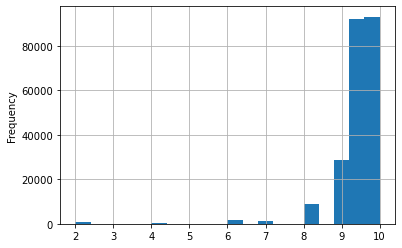

In [24]:
# For classification purpose, we transfer numerical y to various groups of prices

# First we can have a look to the prices in a histogram
import matplotlib.pyplot as plt
%matplotlib inline

y.plot.hist(grid=True, bins=20) # but it seems like the prices is very imbalanced, there are a few outliers

In [25]:
# We then assgin the value to ranges based on the description

y[(y<=8)]=0
y[(y<=9.5) & (y>8)]=1
y[(y<=9.8) & (y>9.5)]=2
y[(y>9.8)]=3

<ipython-input-25-440eeb113a7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[(y<=8)]=0
<ipython-input-25-440eeb113a7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[(y<=9.5) & (y>8)]=1
<ipython-input-25-440eeb113a7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[(y<=9.8) & (y>9.5)]=2
<ipython-input-25-440eeb113a7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

([<matplotlib.axis.XTick at 0x7fae1294af70>,
 [Text(0, 0, 'Group1'),
  Text(1, 0, 'Group2'),
  Text(2, 0, 'Group3'),
  Text(3, 0, 'Group4')])

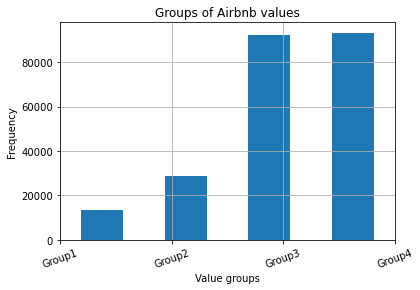

In [26]:
y.plot.hist(grid=True, bins=4, rwidth=0.5) 
plt.title('Groups of Airbnb values')
plt.xlabel('Value groups')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3],["Group1", "Group2", "Group3","Group4"], rotation=20)

# Model Building

In [27]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(10) #temporarily set it to 10, we may change it later

#Transform the data
X_pca = pca.fit_transform(X_norm)
print(pca.explained_variance_ratio_)

[6.32948771e-01 2.62474970e-01 3.50539360e-02 2.49185356e-02
 1.68643885e-02 1.47975920e-02 1.06116723e-02 1.28767644e-03
 4.38577772e-04 1.80829118e-04]


In [28]:
# Check the shape of the new data
X_pca.shape

(227616, 10)

Text(0.5, 0, 'Number of Component')

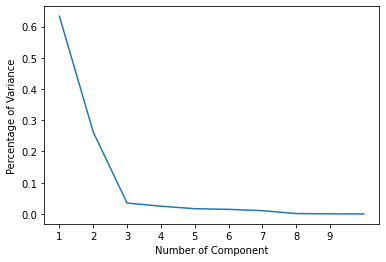

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4,5,6,7,8,9,10], pca.explained_variance_ratio_)
plt.ylabel("Percentage of Variance")
plt.xticks(np.arange(1, 10, 1.0))
plt.xlabel("Number of Component")

## Decision tree


average precision: 0.6875289921306771
average recall: 0.4786746145192432
average f1-score: 0.38251181786433663


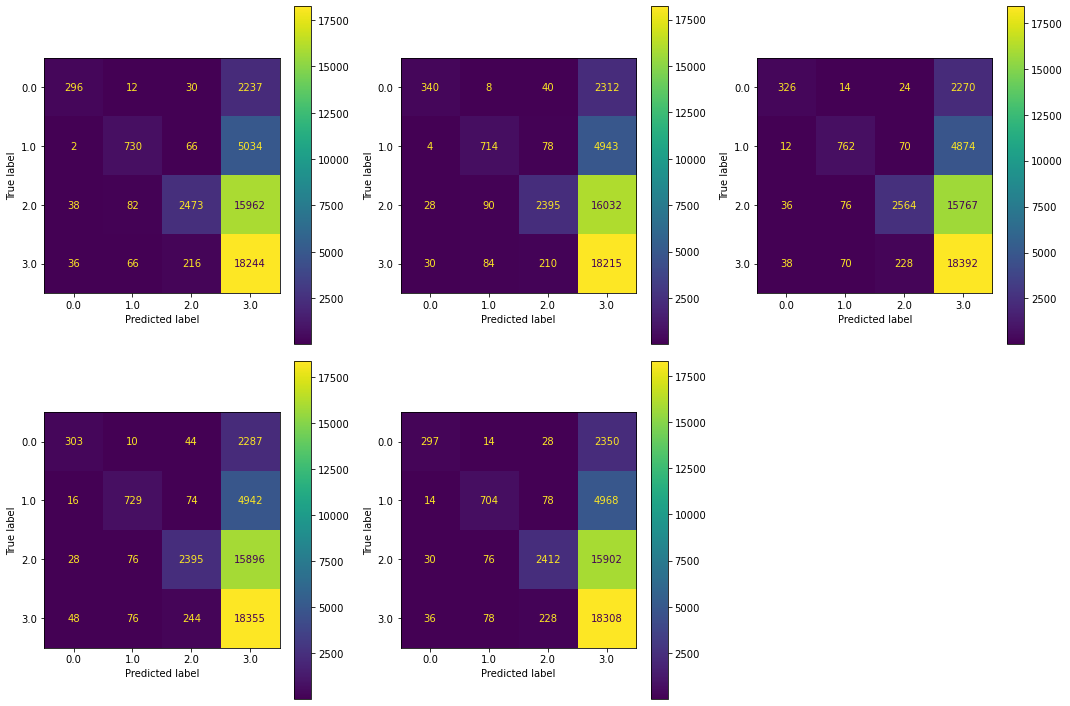

In [30]:
# Decision Tree Model -- mean is added ****************************************
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

# Initiate classifier
kf = model_selection.KFold(n_splits=5, shuffle=True)
infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    infoGain_clf .fit(X_train, y_train)
    predicted = infoGain_clf .predict(X_test)
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    #print(metrics.classification_report(y_test, predicted))
    metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test, ax=ax)
    # metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test).ax_.grid(False)
axes[1][2].set_visible(False)
print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))
plt.tight_layout()  
plt.show()

## Naive Bayes


average precision: 0.35682511231450176
average recall: 0.3428636698858608
average f1-score: 0.21236050733673872


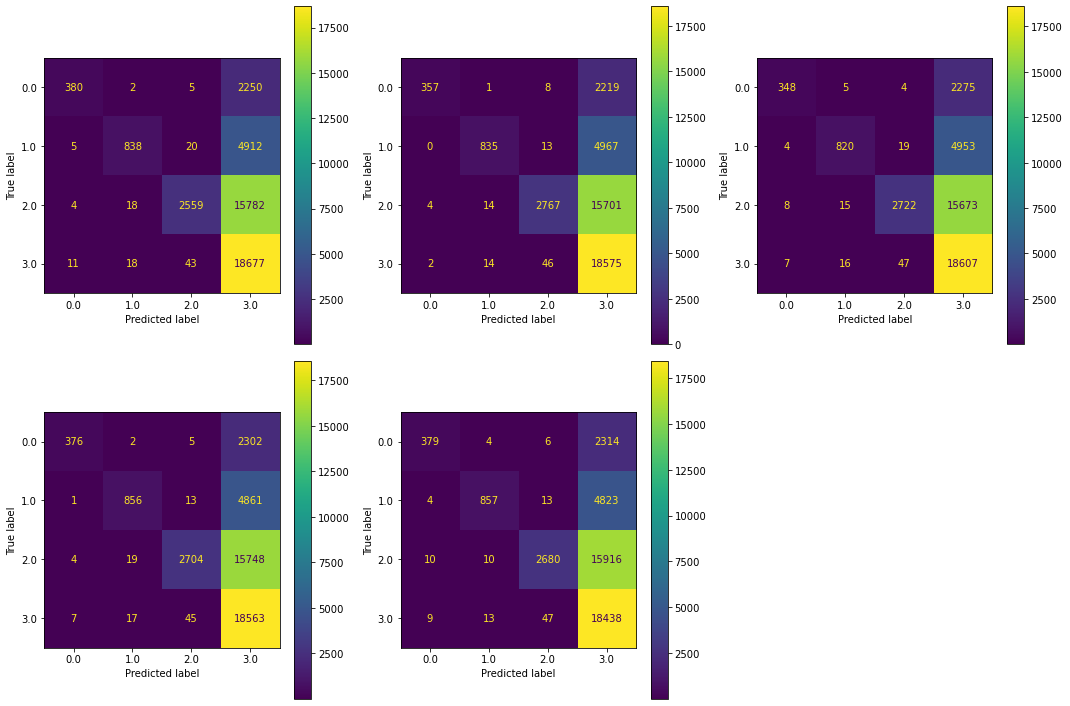

In [31]:
# Naive Bayes Model
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

# Initiate classifier
kf = model_selection.KFold(n_splits=5, shuffle=True)
gaussian_clf = GaussianNB()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gaussian_clf.fit(X_train, y_train)
    predicted = gaussian_clf.predict(X_test)
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    # print(metrics.classification_report(y_test, predicted))
    metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test, ax=ax)
    # metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test).ax_.grid(False)
axes[1][2].set_visible(False)

print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()


## KNN


Mean Squared Error: 0.31
R^2: 0.87
average precision: 0.8691660513626868
average recall: 0.8691480277130899
average f1-score: 0.8691455254892059


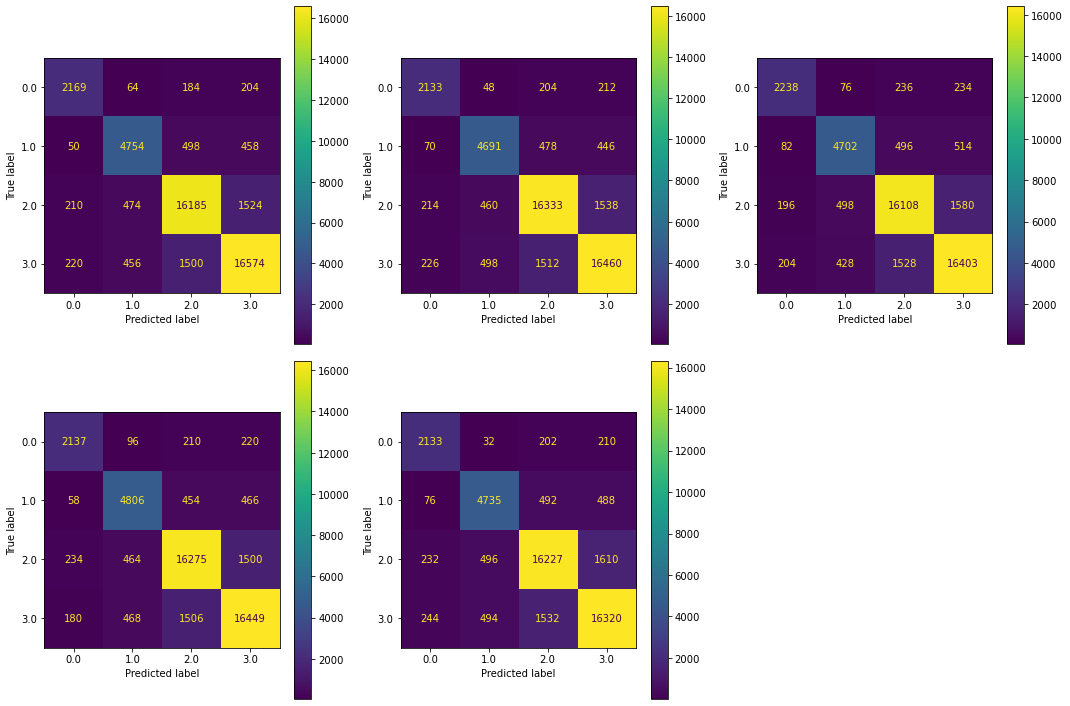

In [32]:
#KNN
from sklearn import neighbors

knn_class = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
kf = model_selection.KFold(n_splits=5, shuffle=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0


for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn_class.fit(X_train, y_train)
    predicted = knn_class.predict(X_test)
#     print(metrics.confusion_matrix(y_test, predicted))
#     print(metrics.classification_report(y_test, predicted))
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    metrics.plot_confusion_matrix(knn_class, X_test, y_test, ax=ax)
axes[1][2].set_visible(False)

print("")
print("Mean Squared Error: %.2f"
      % np.mean((knn_class.predict(X_test) - y_test) ** 2))
print('R^2: %.2f' % knn_class.score(X_test, y_test))
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()

## Random Forest


average precision: 0.6797329342095539
average recall: 0.4693387118897017
average f1-score: 0.3646534343424174


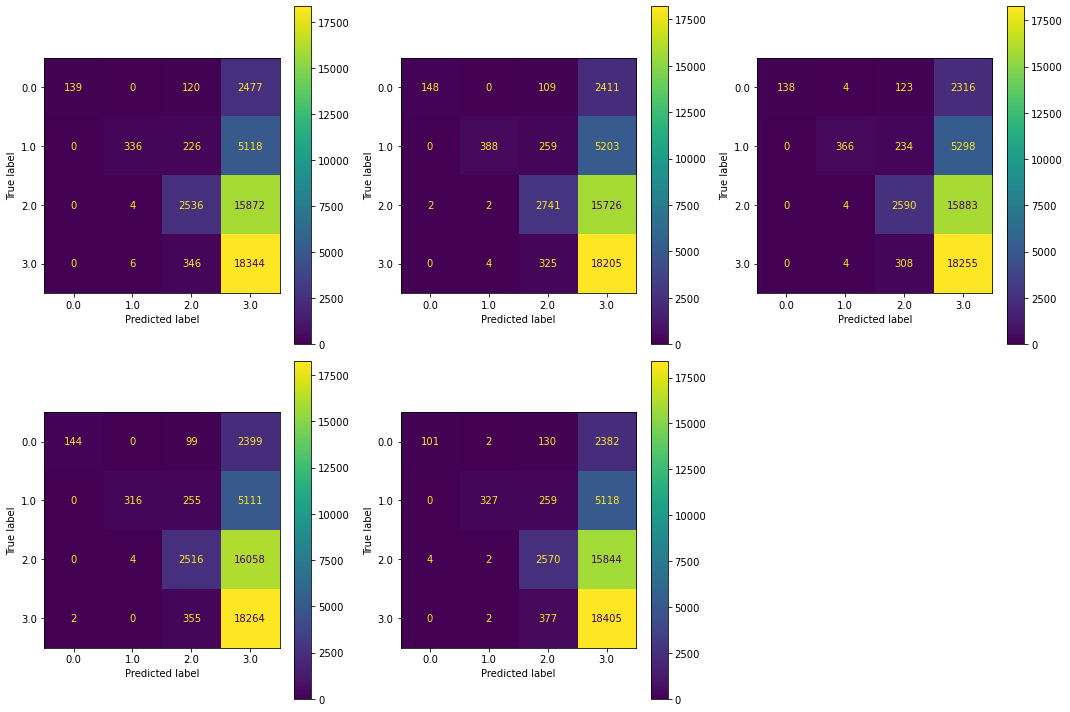

In [33]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(max_depth=50, random_state=0)
kf = model_selection.KFold(n_splits=5, shuffle=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    randomForest.fit(X_train, y_train)
    predicted = randomForest.predict(X_test)
#     print(metrics.confusion_matrix(y_test, predicted))
#     print(metrics.classification_report(y_test, predicted))
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    metrics.plot_confusion_matrix(randomForest, X_test, y_test,ax=ax)
axes[1][2].set_visible(False)

print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()

## SVM

In [ ]:
from sklearn import svm

svm_classifiser = svm.SVC()
kf = model_selection.KFold(n_splits=5, shuffle=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm_classifiser.fit(X_train, y_train)
    predicted = svm_classifiser.predict(X_test)
#     print(metrics.confusion_matrix(y_test, predicted))
#     print(metrics.classification_report(y_test, predicted))
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    metrics.plot_confusion_matrix(svm_classifiser, X_test, y_test,ax=ax)
    
axes[1][2].set_visible(False)

print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()